In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import pandas as pd
import seaborn as sns
import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



d = pd.read_csv('houses_edited.csv')


features = ["bedrooms", "bathrooms", "sqft", "parking", 
            "mean_district_income", "Plex", "Semi-Detached", 
            "Store W/Apt/Offc", "Co-Op Apt", "Co-Ownership Apt", 
            "Link", "Comm Element Condo", "Att/Row/Twnhouse", 
            "Condo Townhouse", "Detached", "Condo Apt"] #define list of features to input in nerual network


df = pd.DataFrame(data = d)


def remove_beds(x): #function to remove the word "beds" from column of number of beds
    x = x.replace(" beds", "")
    return x
def calc_beds(j): #function to calculate number of beds from string
    answer = sum(int(i) for i in j.split('+'))
    return answer


df.bedrooms = df.bedrooms.apply(remove_beds) 
df.bedrooms = df.bedrooms.apply(calc_beds)

In [2]:
df = df.drop(["description", "mls", "bedrooms_ag", "bedrooms_bg", "full_link", "full_address", "title",
              "final_price_transformed", "final_price_log", "city_district", "district_code",
              "index", "lat", "long", "list_price"], axis = 1) #Remove insignificant values

#Fill missing sqft values based on type of property

sqft_Store = 0
sqft_Link = 0
sqft_Twn = 0
sqft_Plex = 0
sqft_Detached = 0
sqft_Semi_detached = 0
sqft_Store_count = 0
sqft_Link_count = 0
sqft_Twn_count = 0
sqft_Plex_count = 0
sqft_Detached_count = 0
sqft_Semi_detached_count = 0


for index, row in df.iterrows():
    if pd.notnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
      sqft_Store += row["sqft"]
      sqft_Store_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Link":
      sqft_Link += row["sqft"]
      sqft_Link_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
      sqft_Twn += row["sqft"]
      sqft_Twn_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Plex":
      sqft_Plex += row["sqft"]
      sqft_Plex_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Detached":
      sqft_Detached += row["sqft"]
      sqft_Detached_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Semi-Detached":
      sqft_Semi_detached += row["sqft"]
      sqft_Semi_detached_count += 1

avg_Store = sqft_Store/sqft_Store_count
avg_Link = sqft_Link/sqft_Link_count
avg_Twn = sqft_Twn/sqft_Twn_count
avg_Plex = sqft_Plex/sqft_Plex_count
avg_Detached = sqft_Detached/sqft_Detached_count
avg_Semi_detached = sqft_Semi_detached/sqft_Semi_detached_count


for index, row in df.iterrows():
  #print(row["type"], row["sqft"])
  if pd.isnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
    df.at[index, "sqft"] = avg_Store

  if pd.isnull(row["sqft"]) and row["type"] == "Link":
    df.at[index, "sqft"] = avg_Link

  if pd.isnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
    df.at[index, "sqft"] = avg_Twn

  if pd.isnull(row["sqft"]) and row["type"] == "Plex":
    df.at[index, "sqft"] = avg_Plex

  if pd.isnull(row["sqft"]) and row["type"] == "Detached":
    df.at[index, "sqft"] = avg_Detached

  if pd.isnull(row["sqft"]) and row["type"] == "Semi-Detached":
    df.at[index, "sqft"] = avg_Semi_detached


dummy_type = pd.get_dummies(df["type"]) #allow 
df = pd.concat([df, dummy_type], axis = 1)
df = df.drop(["type"], axis = 1)

In [18]:
train, test = train_test_split(df, test_size = 0.20, random_state = 0) #Split data into 2 parts, 
                                                                       #training and testing data, with ratio 8:2 

x_train = train[features]
y_train = train[['final_price']]

model = Sequential()

model.add(Dense(64, input_dim = 16,activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate = 0.02) 

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MeanAbsolutePercentageError'])
training = model.fit(x_train, y_train, epochs = 1500, batch_size = 200, shuffle = False, verbose = 2)
#training = model.predict(x_train)
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy))

predictions = model.predict(x_train)
#print(predictions)
for i in range(10):
  print("%d, expected: %d" % (predictions[i], y_train.iloc[i]))

# Predicting prices from test set
# x_test = test[features]
# y_test = test[['final_price']]


# print(model.evaluate(x_test, y_test))


#Best hyperparameter result
# MSPE: 17.95%
# Neural layers: 64, 32, 1
# Learning rate: 0.03
# Epochs: 1500
# Batch size; 200


Epoch 1/1500
61/61 - 0s - loss: 428589187072.0000 - mean_absolute_percentage_error: 47.4361
Epoch 2/1500
61/61 - 0s - loss: 272210231296.0000 - mean_absolute_percentage_error: 35.0334
Epoch 3/1500
61/61 - 0s - loss: 203771920384.0000 - mean_absolute_percentage_error: 28.9969
Epoch 4/1500
61/61 - 0s - loss: 176236232704.0000 - mean_absolute_percentage_error: 28.3164
Epoch 5/1500
61/61 - 0s - loss: 174682079232.0000 - mean_absolute_percentage_error: 28.0792
Epoch 6/1500
61/61 - 0s - loss: 174493532160.0000 - mean_absolute_percentage_error: 28.0832
Epoch 7/1500
61/61 - 0s - loss: 174411563008.0000 - mean_absolute_percentage_error: 28.0722
Epoch 8/1500
61/61 - 0s - loss: 174360395776.0000 - mean_absolute_percentage_error: 28.0640
Epoch 9/1500
61/61 - 0s - loss: 174319419392.0000 - mean_absolute_percentage_error: 28.0570
Epoch 10/1500
61/61 - 0s - loss: 174283603968.0000 - mean_absolute_percentage_error: 28.0505
Epoch 11/1500
61/61 - 0s - loss: 174250688512.0000 - mean_absolute_percentage_e

Epoch 90/1500
61/61 - 0s - loss: 171848335360.0000 - mean_absolute_percentage_error: 27.6099
Epoch 91/1500
61/61 - 0s - loss: 171812012032.0000 - mean_absolute_percentage_error: 27.6029
Epoch 92/1500
61/61 - 0s - loss: 171775787008.0000 - mean_absolute_percentage_error: 27.5962
Epoch 93/1500
61/61 - 0s - loss: 171741052928.0000 - mean_absolute_percentage_error: 27.5892
Epoch 94/1500
61/61 - 0s - loss: 171702370304.0000 - mean_absolute_percentage_error: 27.5822
Epoch 95/1500
61/61 - 0s - loss: 171666948096.0000 - mean_absolute_percentage_error: 27.5749
Epoch 96/1500
61/61 - 0s - loss: 171630231552.0000 - mean_absolute_percentage_error: 27.5680
Epoch 97/1500
61/61 - 0s - loss: 171594907648.0000 - mean_absolute_percentage_error: 27.5609
Epoch 98/1500
61/61 - 0s - loss: 171554783232.0000 - mean_absolute_percentage_error: 27.5534
Epoch 99/1500
61/61 - 0s - loss: 171517820928.0000 - mean_absolute_percentage_error: 27.5462
Epoch 100/1500
61/61 - 0s - loss: 171482578944.0000 - mean_absolute_pe

Epoch 178/1500
61/61 - 0s - loss: 156097200128.0000 - mean_absolute_percentage_error: 27.8956
Epoch 179/1500
61/61 - 0s - loss: 154929430528.0000 - mean_absolute_percentage_error: 27.6782
Epoch 180/1500
61/61 - 0s - loss: 153924075520.0000 - mean_absolute_percentage_error: 27.5072
Epoch 181/1500
61/61 - 0s - loss: 154087882752.0000 - mean_absolute_percentage_error: 27.5001
Epoch 182/1500
61/61 - 0s - loss: 153179193344.0000 - mean_absolute_percentage_error: 27.4296
Epoch 183/1500
61/61 - 0s - loss: 153060638720.0000 - mean_absolute_percentage_error: 27.4511
Epoch 184/1500
61/61 - 0s - loss: 153057656832.0000 - mean_absolute_percentage_error: 27.4425
Epoch 185/1500
61/61 - 0s - loss: 152918556672.0000 - mean_absolute_percentage_error: 27.3677
Epoch 186/1500
61/61 - 0s - loss: 152440143872.0000 - mean_absolute_percentage_error: 27.2368
Epoch 187/1500
61/61 - 0s - loss: 152373428224.0000 - mean_absolute_percentage_error: 27.3162
Epoch 188/1500
61/61 - 0s - loss: 152011948032.0000 - mean_a

61/61 - 0s - loss: 131972931584.0000 - mean_absolute_percentage_error: 23.8295
Epoch 266/1500
61/61 - 0s - loss: 130453815296.0000 - mean_absolute_percentage_error: 23.0670
Epoch 267/1500
61/61 - 0s - loss: 132243644416.0000 - mean_absolute_percentage_error: 23.5252
Epoch 268/1500
61/61 - 0s - loss: 130558214144.0000 - mean_absolute_percentage_error: 23.1387
Epoch 269/1500
61/61 - 0s - loss: 133853642752.0000 - mean_absolute_percentage_error: 24.1527
Epoch 270/1500
61/61 - 0s - loss: 129380933632.0000 - mean_absolute_percentage_error: 23.0467
Epoch 271/1500
61/61 - 0s - loss: 129579646976.0000 - mean_absolute_percentage_error: 23.2273
Epoch 272/1500
61/61 - 0s - loss: 130371215360.0000 - mean_absolute_percentage_error: 23.3479
Epoch 273/1500
61/61 - 0s - loss: 131190816768.0000 - mean_absolute_percentage_error: 23.4005
Epoch 274/1500
61/61 - 0s - loss: 132286586880.0000 - mean_absolute_percentage_error: 23.5710
Epoch 275/1500
61/61 - 0s - loss: 129035452416.0000 - mean_absolute_percent

Epoch 353/1500
61/61 - 0s - loss: 126083465216.0000 - mean_absolute_percentage_error: 23.0059
Epoch 354/1500
61/61 - 0s - loss: 125726826496.0000 - mean_absolute_percentage_error: 22.7441
Epoch 355/1500
61/61 - 0s - loss: 125928841216.0000 - mean_absolute_percentage_error: 22.6990
Epoch 356/1500
61/61 - 0s - loss: 123429142528.0000 - mean_absolute_percentage_error: 22.4004
Epoch 357/1500
61/61 - 0s - loss: 125339525120.0000 - mean_absolute_percentage_error: 22.5188
Epoch 358/1500
61/61 - 0s - loss: 125112926208.0000 - mean_absolute_percentage_error: 22.5694
Epoch 359/1500
61/61 - 0s - loss: 126698758144.0000 - mean_absolute_percentage_error: 22.9028
Epoch 360/1500
61/61 - 0s - loss: 125078503424.0000 - mean_absolute_percentage_error: 22.2617
Epoch 361/1500
61/61 - 0s - loss: 123181719552.0000 - mean_absolute_percentage_error: 22.1735
Epoch 362/1500
61/61 - 0s - loss: 123994087424.0000 - mean_absolute_percentage_error: 22.3218
Epoch 363/1500
61/61 - 0s - loss: 125975470080.0000 - mean_a

Epoch 441/1500
61/61 - 0s - loss: 124759146496.0000 - mean_absolute_percentage_error: 22.8764
Epoch 442/1500
61/61 - 0s - loss: 124104835072.0000 - mean_absolute_percentage_error: 22.3771
Epoch 443/1500
61/61 - 0s - loss: 122762878976.0000 - mean_absolute_percentage_error: 22.1279
Epoch 444/1500
61/61 - 0s - loss: 120168611840.0000 - mean_absolute_percentage_error: 21.6430
Epoch 445/1500
61/61 - 0s - loss: 122697678848.0000 - mean_absolute_percentage_error: 22.1442
Epoch 446/1500
61/61 - 0s - loss: 123875131392.0000 - mean_absolute_percentage_error: 22.2050
Epoch 447/1500
61/61 - 0s - loss: 123087314944.0000 - mean_absolute_percentage_error: 22.1793
Epoch 448/1500
61/61 - 0s - loss: 119941464064.0000 - mean_absolute_percentage_error: 21.8772
Epoch 449/1500
61/61 - 0s - loss: 123490697216.0000 - mean_absolute_percentage_error: 22.1618
Epoch 450/1500
61/61 - 0s - loss: 122074423296.0000 - mean_absolute_percentage_error: 21.9564
Epoch 451/1500
61/61 - 0s - loss: 125636968448.0000 - mean_a

61/61 - 0s - loss: 122599530496.0000 - mean_absolute_percentage_error: 22.1367
Epoch 529/1500
61/61 - 0s - loss: 122049519616.0000 - mean_absolute_percentage_error: 21.9699
Epoch 530/1500
61/61 - 0s - loss: 121783549952.0000 - mean_absolute_percentage_error: 22.2588
Epoch 531/1500
61/61 - 0s - loss: 120662564864.0000 - mean_absolute_percentage_error: 22.3687
Epoch 532/1500
61/61 - 0s - loss: 120483774464.0000 - mean_absolute_percentage_error: 22.2362
Epoch 533/1500
61/61 - 0s - loss: 122656448512.0000 - mean_absolute_percentage_error: 22.0950
Epoch 534/1500
61/61 - 0s - loss: 124581404672.0000 - mean_absolute_percentage_error: 22.5047
Epoch 535/1500
61/61 - 0s - loss: 121754124288.0000 - mean_absolute_percentage_error: 22.4282
Epoch 536/1500
61/61 - 0s - loss: 123273338880.0000 - mean_absolute_percentage_error: 22.4784
Epoch 537/1500
61/61 - 0s - loss: 121905029120.0000 - mean_absolute_percentage_error: 22.6690
Epoch 538/1500
61/61 - 0s - loss: 124364357632.0000 - mean_absolute_percent

Epoch 616/1500
61/61 - 0s - loss: 112898686976.0000 - mean_absolute_percentage_error: 21.1260
Epoch 617/1500
61/61 - 0s - loss: 116740538368.0000 - mean_absolute_percentage_error: 21.7898
Epoch 618/1500
61/61 - 0s - loss: 117235212288.0000 - mean_absolute_percentage_error: 21.3522
Epoch 619/1500
61/61 - 0s - loss: 118293946368.0000 - mean_absolute_percentage_error: 21.6928
Epoch 620/1500
61/61 - 0s - loss: 113478090752.0000 - mean_absolute_percentage_error: 21.2578
Epoch 621/1500
61/61 - 0s - loss: 120986230784.0000 - mean_absolute_percentage_error: 22.1997
Epoch 622/1500
61/61 - 0s - loss: 115256705024.0000 - mean_absolute_percentage_error: 21.2074
Epoch 623/1500
61/61 - 0s - loss: 115793821696.0000 - mean_absolute_percentage_error: 21.4900
Epoch 624/1500
61/61 - 0s - loss: 111673057280.0000 - mean_absolute_percentage_error: 20.8119
Epoch 625/1500
61/61 - 0s - loss: 119933255680.0000 - mean_absolute_percentage_error: 22.0776
Epoch 626/1500
61/61 - 0s - loss: 117667094528.0000 - mean_a

61/61 - 0s - loss: 117088575488.0000 - mean_absolute_percentage_error: 21.6189
Epoch 704/1500
61/61 - 0s - loss: 118687039488.0000 - mean_absolute_percentage_error: 21.9069
Epoch 705/1500
61/61 - 0s - loss: 113361190912.0000 - mean_absolute_percentage_error: 21.2078
Epoch 706/1500
61/61 - 0s - loss: 110707589120.0000 - mean_absolute_percentage_error: 20.9964
Epoch 707/1500
61/61 - 0s - loss: 116605796352.0000 - mean_absolute_percentage_error: 21.7165
Epoch 708/1500
61/61 - 0s - loss: 117854322688.0000 - mean_absolute_percentage_error: 21.6682
Epoch 709/1500
61/61 - 0s - loss: 110391574528.0000 - mean_absolute_percentage_error: 21.0097
Epoch 710/1500
61/61 - 0s - loss: 110006738944.0000 - mean_absolute_percentage_error: 20.8269
Epoch 711/1500
61/61 - 0s - loss: 128491773952.0000 - mean_absolute_percentage_error: 23.2775
Epoch 712/1500
61/61 - 0s - loss: 113563705344.0000 - mean_absolute_percentage_error: 21.6046
Epoch 713/1500
61/61 - 0s - loss: 118264856576.0000 - mean_absolute_percent

Epoch 791/1500
61/61 - 0s - loss: 116588101632.0000 - mean_absolute_percentage_error: 20.8214
Epoch 792/1500
61/61 - 0s - loss: 117171208192.0000 - mean_absolute_percentage_error: 20.9856
Epoch 793/1500
61/61 - 0s - loss: 117825765376.0000 - mean_absolute_percentage_error: 21.2224
Epoch 794/1500
61/61 - 0s - loss: 116891623424.0000 - mean_absolute_percentage_error: 21.0870
Epoch 795/1500
61/61 - 0s - loss: 116702838784.0000 - mean_absolute_percentage_error: 20.8961
Epoch 796/1500
61/61 - 0s - loss: 117593497600.0000 - mean_absolute_percentage_error: 21.1744
Epoch 797/1500
61/61 - 0s - loss: 116358037504.0000 - mean_absolute_percentage_error: 20.8102
Epoch 798/1500
61/61 - 0s - loss: 116354916352.0000 - mean_absolute_percentage_error: 20.8703
Epoch 799/1500
61/61 - 0s - loss: 116173365248.0000 - mean_absolute_percentage_error: 20.8824
Epoch 800/1500
61/61 - 0s - loss: 116351844352.0000 - mean_absolute_percentage_error: 20.7760
Epoch 801/1500
61/61 - 0s - loss: 117403516928.0000 - mean_a

61/61 - 0s - loss: 115167117312.0000 - mean_absolute_percentage_error: 20.7102
Epoch 879/1500
61/61 - 0s - loss: 116078862336.0000 - mean_absolute_percentage_error: 20.8929
Epoch 880/1500
61/61 - 0s - loss: 113026129920.0000 - mean_absolute_percentage_error: 20.5539
Epoch 881/1500
61/61 - 0s - loss: 114839945216.0000 - mean_absolute_percentage_error: 20.6364
Epoch 882/1500
61/61 - 0s - loss: 121049292800.0000 - mean_absolute_percentage_error: 22.0017
Epoch 883/1500
61/61 - 0s - loss: 117744754688.0000 - mean_absolute_percentage_error: 21.1036
Epoch 884/1500
61/61 - 0s - loss: 117566128128.0000 - mean_absolute_percentage_error: 21.0181
Epoch 885/1500
61/61 - 0s - loss: 114586918912.0000 - mean_absolute_percentage_error: 20.5877
Epoch 886/1500
61/61 - 0s - loss: 113383505920.0000 - mean_absolute_percentage_error: 20.4882
Epoch 887/1500
61/61 - 0s - loss: 115443769344.0000 - mean_absolute_percentage_error: 20.7131
Epoch 888/1500
61/61 - 0s - loss: 116810170368.0000 - mean_absolute_percent

Epoch 966/1500
61/61 - 0s - loss: 115433619456.0000 - mean_absolute_percentage_error: 20.6276
Epoch 967/1500
61/61 - 0s - loss: 123493744640.0000 - mean_absolute_percentage_error: 21.8780
Epoch 968/1500
61/61 - 0s - loss: 116639866880.0000 - mean_absolute_percentage_error: 20.6994
Epoch 969/1500
61/61 - 0s - loss: 122966392832.0000 - mean_absolute_percentage_error: 21.9472
Epoch 970/1500
61/61 - 0s - loss: 123581136896.0000 - mean_absolute_percentage_error: 21.7373
Epoch 971/1500
61/61 - 0s - loss: 117739782144.0000 - mean_absolute_percentage_error: 20.8709
Epoch 972/1500
61/61 - 0s - loss: 122600243200.0000 - mean_absolute_percentage_error: 21.8731
Epoch 973/1500
61/61 - 0s - loss: 116924940288.0000 - mean_absolute_percentage_error: 20.7628
Epoch 974/1500
61/61 - 0s - loss: 121412681728.0000 - mean_absolute_percentage_error: 21.4981
Epoch 975/1500
61/61 - 0s - loss: 116817403904.0000 - mean_absolute_percentage_error: 20.8596
Epoch 976/1500
61/61 - 0s - loss: 121758564352.0000 - mean_a

Epoch 1053/1500
61/61 - 0s - loss: 119645495296.0000 - mean_absolute_percentage_error: 21.2702
Epoch 1054/1500
61/61 - 0s - loss: 116391518208.0000 - mean_absolute_percentage_error: 20.6969
Epoch 1055/1500
61/61 - 0s - loss: 122065035264.0000 - mean_absolute_percentage_error: 21.5526
Epoch 1056/1500
61/61 - 0s - loss: 116353572864.0000 - mean_absolute_percentage_error: 20.7203
Epoch 1057/1500
61/61 - 0s - loss: 122067140608.0000 - mean_absolute_percentage_error: 21.6275
Epoch 1058/1500
61/61 - 0s - loss: 117103132672.0000 - mean_absolute_percentage_error: 20.8291
Epoch 1059/1500
61/61 - 0s - loss: 121722912768.0000 - mean_absolute_percentage_error: 21.5058
Epoch 1060/1500
61/61 - 0s - loss: 116170326016.0000 - mean_absolute_percentage_error: 20.6434
Epoch 1061/1500
61/61 - 0s - loss: 121344344064.0000 - mean_absolute_percentage_error: 21.4590
Epoch 1062/1500
61/61 - 0s - loss: 116667400192.0000 - mean_absolute_percentage_error: 20.7268
Epoch 1063/1500
61/61 - 0s - loss: 121473564672.00

Epoch 1140/1500
61/61 - 0s - loss: 123450826752.0000 - mean_absolute_percentage_error: 21.7032
Epoch 1141/1500
61/61 - 0s - loss: 119252492288.0000 - mean_absolute_percentage_error: 21.3107
Epoch 1142/1500
61/61 - 0s - loss: 119745118208.0000 - mean_absolute_percentage_error: 21.2579
Epoch 1143/1500
61/61 - 0s - loss: 117281964032.0000 - mean_absolute_percentage_error: 20.8768
Epoch 1144/1500
61/61 - 0s - loss: 121780756480.0000 - mean_absolute_percentage_error: 21.4059
Epoch 1145/1500
61/61 - 0s - loss: 119100243968.0000 - mean_absolute_percentage_error: 21.1171
Epoch 1146/1500
61/61 - 0s - loss: 115817005056.0000 - mean_absolute_percentage_error: 20.6691
Epoch 1147/1500
61/61 - 0s - loss: 120635236352.0000 - mean_absolute_percentage_error: 21.2913
Epoch 1148/1500
61/61 - 0s - loss: 116912472064.0000 - mean_absolute_percentage_error: 20.7525
Epoch 1149/1500
61/61 - 0s - loss: 121225322496.0000 - mean_absolute_percentage_error: 21.3943
Epoch 1150/1500
61/61 - 0s - loss: 118073761792.00

Epoch 1227/1500
61/61 - 0s - loss: 117430222848.0000 - mean_absolute_percentage_error: 20.8081
Epoch 1228/1500
61/61 - 0s - loss: 117135261696.0000 - mean_absolute_percentage_error: 20.8396
Epoch 1229/1500
61/61 - 0s - loss: 117663416320.0000 - mean_absolute_percentage_error: 20.7186
Epoch 1230/1500
61/61 - 0s - loss: 117487403008.0000 - mean_absolute_percentage_error: 20.8786
Epoch 1231/1500
61/61 - 0s - loss: 116350271488.0000 - mean_absolute_percentage_error: 20.6760
Epoch 1232/1500
61/61 - 0s - loss: 116414750720.0000 - mean_absolute_percentage_error: 20.7094
Epoch 1233/1500
61/61 - 0s - loss: 116642750464.0000 - mean_absolute_percentage_error: 20.7033
Epoch 1234/1500
61/61 - 0s - loss: 117095636992.0000 - mean_absolute_percentage_error: 20.7547
Epoch 1235/1500
61/61 - 0s - loss: 117163261952.0000 - mean_absolute_percentage_error: 20.7862
Epoch 1236/1500
61/61 - 0s - loss: 117060157440.0000 - mean_absolute_percentage_error: 20.7711
Epoch 1237/1500
61/61 - 0s - loss: 117223882752.00

Epoch 1314/1500
61/61 - 0s - loss: 116783554560.0000 - mean_absolute_percentage_error: 20.7721
Epoch 1315/1500
61/61 - 0s - loss: 116503068672.0000 - mean_absolute_percentage_error: 20.7196
Epoch 1316/1500
61/61 - 0s - loss: 116245020672.0000 - mean_absolute_percentage_error: 20.7090
Epoch 1317/1500
61/61 - 0s - loss: 116051746816.0000 - mean_absolute_percentage_error: 20.6704
Epoch 1318/1500
61/61 - 0s - loss: 116222443520.0000 - mean_absolute_percentage_error: 20.7116
Epoch 1319/1500
61/61 - 0s - loss: 116658176000.0000 - mean_absolute_percentage_error: 20.7232
Epoch 1320/1500
61/61 - 0s - loss: 116827922432.0000 - mean_absolute_percentage_error: 20.7783
Epoch 1321/1500
61/61 - 0s - loss: 116063854592.0000 - mean_absolute_percentage_error: 20.6775
Epoch 1322/1500
61/61 - 0s - loss: 116422483968.0000 - mean_absolute_percentage_error: 20.7013
Epoch 1323/1500
61/61 - 0s - loss: 116865818624.0000 - mean_absolute_percentage_error: 20.7852
Epoch 1324/1500
61/61 - 0s - loss: 116476608512.00

Epoch 1401/1500
61/61 - 0s - loss: 115004981248.0000 - mean_absolute_percentage_error: 20.4787
Epoch 1402/1500
61/61 - 0s - loss: 116765106176.0000 - mean_absolute_percentage_error: 20.6876
Epoch 1403/1500
61/61 - 0s - loss: 115139100672.0000 - mean_absolute_percentage_error: 20.4284
Epoch 1404/1500
61/61 - 0s - loss: 120732049408.0000 - mean_absolute_percentage_error: 21.3936
Epoch 1405/1500
61/61 - 0s - loss: 119121707008.0000 - mean_absolute_percentage_error: 21.2381
Epoch 1406/1500
61/61 - 0s - loss: 117386149888.0000 - mean_absolute_percentage_error: 20.9191
Epoch 1407/1500
61/61 - 0s - loss: 113879252992.0000 - mean_absolute_percentage_error: 20.4256
Epoch 1408/1500
61/61 - 0s - loss: 116119142400.0000 - mean_absolute_percentage_error: 20.7012
Epoch 1409/1500
61/61 - 0s - loss: 114222972928.0000 - mean_absolute_percentage_error: 20.4253
Epoch 1410/1500
61/61 - 0s - loss: 117023703040.0000 - mean_absolute_percentage_error: 20.8167
Epoch 1411/1500
61/61 - 0s - loss: 113420353536.00

Epoch 1488/1500
61/61 - 0s - loss: 110814445568.0000 - mean_absolute_percentage_error: 20.6051
Epoch 1489/1500
61/61 - 0s - loss: 108580921344.0000 - mean_absolute_percentage_error: 20.1074
Epoch 1490/1500
61/61 - 0s - loss: 111707586560.0000 - mean_absolute_percentage_error: 20.5987
Epoch 1491/1500
61/61 - 0s - loss: 111547383808.0000 - mean_absolute_percentage_error: 20.6500
Epoch 1492/1500
61/61 - 0s - loss: 109244088320.0000 - mean_absolute_percentage_error: 20.4330
Epoch 1493/1500
61/61 - 0s - loss: 107415429120.0000 - mean_absolute_percentage_error: 20.1398
Epoch 1494/1500
61/61 - 0s - loss: 108127084544.0000 - mean_absolute_percentage_error: 20.3927
Epoch 1495/1500
61/61 - 0s - loss: 108011143168.0000 - mean_absolute_percentage_error: 20.2945
Epoch 1496/1500
61/61 - 0s - loss: 108407185408.0000 - mean_absolute_percentage_error: 20.3610
Epoch 1497/1500
61/61 - 0s - loss: 108360622080.0000 - mean_absolute_percentage_error: 20.1456
Epoch 1498/1500
61/61 - 0s - loss: 109928898560.00

dict_keys(['loss', 'mean_absolute_percentage_error'])


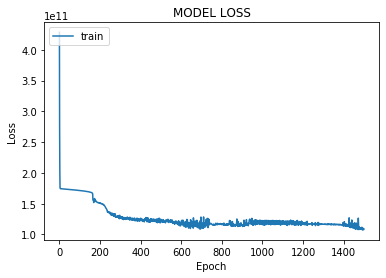

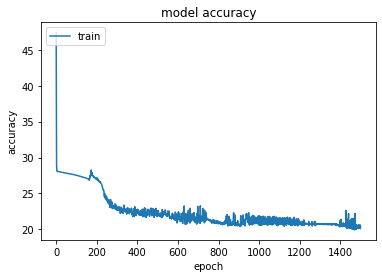

In [19]:
print(training.history.keys())
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['mean_absolute_percentage_error'])
#plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()